<h1 style="text-align:center"> MCHE 485: Mechanical Vibrations</h1>
<h2 style="text-align:center">Mini-Project 2 Symbolic Manipulation <br> Spring 2018</h2>
<p style="text-align:center">Dr. Joshua Vaughan<br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
http://www.ucs.louisiana.edu/~jev9637/</p>

In some configurations, crane payloads can behave like double-pendulums. A planar model that captures this effect is sketched in Figure 1. In this model, the cables are assumed to be massless, inflexible, and inextensible. The main suspension cable (between the trolley and the hook) has a length of $l_1$, and the rigging (between the crane hook and payload) has a length of $l_2$. The hook has mass, $m_h$, and the payload has mass, $m_p$. The angles of the suspension cable and rigging cable are described by $\theta$ and $\phi$, respectively.

<p style="text-align:center">
	<img src="http://crawlab.org/shared/crane_doublePend.png" alt="Crane with Double-pendulum Payload" width=20%><br>
    <strong>Figure 1: Crane with Double-pendulum Payload</strong>
</p>

Most the data you have been given was generated via trolley motion, *residual* vibration (*i.e.* the vibration after the move is finished) can be treated as free vibration with initial conditions corresponding to those at the conclusion of the trolley motion. In this case, the crane model simplifies to the simple double-pendulum one shown in Figure 2. It is this model that you will develop and use in this mini-project.

<p style="text-align:center">
	<img src="http://crawlab.org/shared/fixed_doublePend.png" alt="Double-Pendulum" width=20%><br>
    <strong>Figure 2: Double-Pendulum</strong>
</p>

Using [SymPy](http://sympy.org), we can solve for the eigenvalues and eigenvalues symbolically. We'll first set up and solve the problem just as we would by hand, just replacing the algebra of the solution with SymPy.

In [1]:
import numpy as np
import sympy

sympy.init_printing()

In [2]:
# We want our plots to be displayed inline, not in a separate window
%matplotlib inline 

# Import the plotting functions 
import matplotlib.pyplot as plt

In [3]:
# Let's also improve the printing of NumPy arrays.
np.set_printoptions(precision=3, suppress=True)

In [4]:
# Define the symbols
mh, mp, l1, l2, g = sympy.symbols('m_h m_p l_1 l_2 g')

w, w1, w2 = sympy.symbols('omega omega_1 omega_2')

theta, phi = sympy.symbols('theta phi')

M = sympy.Matrix([[(mh + mp) * l1**2,     mp * l1 * l2],
                  [mp * l1 * l2,          mp * l2**2]])

K = sympy.Matrix([[(mh + mp) * g * l1,    0],
                  [0,                     mp * g * l2]])

In [5]:
# create the matrix to solve
KM = K - w**2 * M

eigenvalues = sympy.solve(KM.det(), w**2)

In SymPy, the easiest way to output the answer is to call it in its own cell.

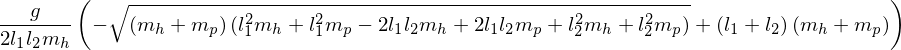

In [6]:
eigenvalues[0]

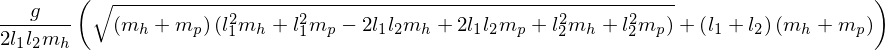

In [7]:
eigenvalues[1]

We can substiute numerical values for those that we know and are constant, leaving only the unknowns in the expressions for the eignevalues.

$ \quad m_h = 50.0 $ kg

and 

$ \quad l_1 = 3.5 $ m

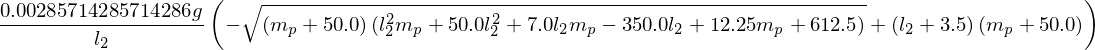

In [8]:
eigenvalues[0].subs([(mh, 50.0), (l1, 3.5)])

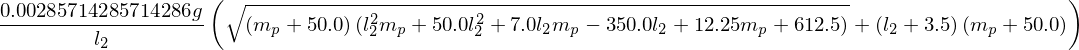

In [9]:
eigenvalues[1].subs([(mh, 50.0), (l1, 3.5)])

We can go further for the first part of the project, where we know the mass of the "normal" payload to be: 

$ \quad m_p = 22.7 $ kg

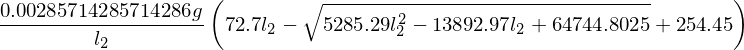

In [10]:
eigenvalues[0].subs([(mh, 50.0), (mp, 22.7), (l1, 3.5)])

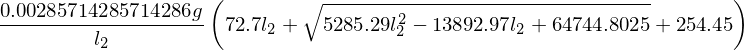

In [11]:
eigenvalues[1].subs([(mh, 50.0), (mp, 22.7), (l1, 3.5)])

We now have two equations to use to solve for $l_2$ in matching the natural frequencies that we found in the experimental data. For one trial from the data, the dominant frequencies in the FFT were 0.2490Hz and 0.4742Hz.

Let's set up a system of equations to solve for $l_2$ to match those frequencies. We'll start by taking the square root of the eigenvalues to get the natural frequencies.

In [12]:
nat_freq_1 = sympy.sqrt(eigenvalues[0].subs([(mh, 50.0), (mp, 22.7), (l1, 3.5), (g, 9.81)]))

nat_freq_2 = sympy.sqrt(eigenvalues[1].subs([(mh, 50.0), (mp, 22.7), (l1, 3.5), (g, 9.81)]))

Then, we'll use those expressions to solve for $l_2$. The `SymPy.Solve()` method wants equations in the form $f(x) = 0$. We'll first solve the equation for the two frequencies separately. The answers should (mostly) agree.

In [13]:
f1_experimental = 0.2490 # Frequency of lowest flexible mode found in experimental data (Hz)
f2_experimental = 0.4742 # Frequency of lowest flexible mode found in experimental data (Hz)

# Convert to rad/s
w1_experimental = f1_experimental * 2 * np.pi 
w2_experimental = f2_experimental * 2 * np.pi 


l_2_from_w1 = sympy.solve(nat_freq_1 - w1_experimental, l2)
l_2_from_w2 = sympy.solve(nat_freq_2 - w2_experimental, l2)

In [14]:
print('The rigging cable length determined using the low mode is: {:.4f}m'.format(l_2_from_w1[0]))

The rigging cable length determined using the low mode is: 1.2715m


In [15]:
print('The rigging cable length determined using the high mode is: {:.4f}m'.format(l_2_from_w2[0]))

The rigging cable length determined using the high mode is: 2.0325m


The two soluations disagree. We'll need to look at the remaining experimental data to try to determine the source of the disagreement and settle on the most-likely estimate for $l_2$.

#### Now, let's look at the eigenvectors.

In [16]:
KM1 = K - eigenvalues[0] * M
KM2 = K - eigenvalues[1] * M

X = sympy.Matrix([[theta], 
                   [phi]])

In [17]:
eigenvect1 = sympy.solve(KM1 * X, (theta, phi))
eigenvect2 = sympy.solve(KM2 * X, (theta, phi))

Because our system of equations is linearly dependent, SymPy will return one of the values in terms of the other, similar to how we solve these problems by hand. So, we can look at the relationship returned to generate the eigenvector.

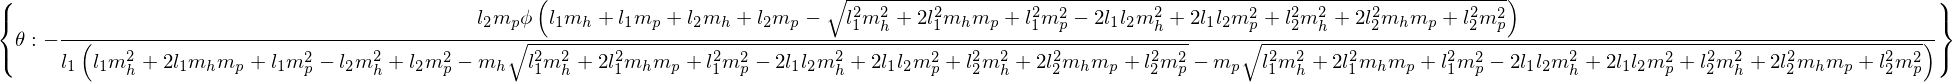

In [18]:
eigenvect1

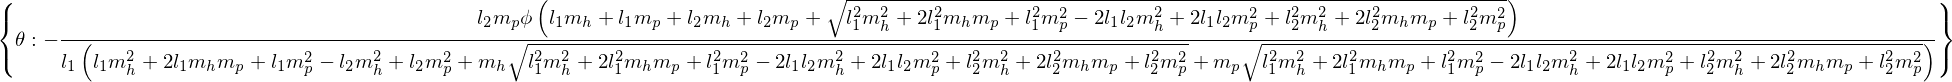

In [19]:
eigenvect2

We could again substitute the numerical values. Let's use the case we looked at above and the length of $l_2$ we found from using the low mode equation.

In [20]:
eigenvect1[theta].subs([(mh, 50.0), (mp, 22.7), (l1, 3.5), (l2, l_2_from_w1[0]), (g, 9.81)])

So, for this set of parameters, in the low mode of oscillation the two masses are moving in phase, with the amplitude of displacement in $\theta \approx 0.782 \phi$.

In [21]:
eigenvect2[theta].subs([(mh, 50.0), (mp, 22.7), (l1, 3.5), (l2, l_2_from_w1[0]), (g, 9.81)])

So, for this set of parameters, in the second, high mode of oscillation the two masses are moving in out of phase, with the amplitude of displacement in $\theta \approx -0.145 \phi$.

<hr style="border: 0px;
        height: 1px;
        text-align: center;
        background: #333;
        background-image: -webkit-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:    -moz-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:     -ms-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:      -o-linear-gradient(left, #ccc, #333, #ccc);">

#### Licenses
Code is licensed under a 3-clause BSD style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.



In [22]:
# This cell will just improve the styling of the notebook
from IPython.core.display import HTML
import urllib.request
response = urllib.request.urlopen("https://cl.ly/1B1y452Z1d35")
HTML(response.read().decode("utf-8"))